In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [18]:
data = np.loadtxt('a.csv', delimiter=',', skiprows=1)

print("Toplam satır:", len(data))
print("İlk satır örneği:", data[0])

Toplam satır: 1000
İlk satır örneği: [45.96056984 31.99677718  5.         55.4032696   7.30035936  0.
  2.83470706 70.54212184]


In [19]:
X = data[:, :-1]
y = data[:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 7)
y shape: (1000,)


In [20]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def computeCostMulti(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h.T, h) / (2 * X.shape[0])
    return J[0][0]

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

def normalize_minmax(X):
    Xmin = X.min(axis=0)
    Xmax = X.max(axis=0)
    X_scaled = (X - Xmin) / (Xmax - Xmin)
    return X_scaled

def normalize_zscore(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_scaled = (X - mu) / sigma
    return X_scaled

In [21]:
X_train, mu, sigma = featureNormalize(X)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
print(X_train.shape)
theta_init = np.zeros((X_train.shape[1], 1))

(1000, 8)


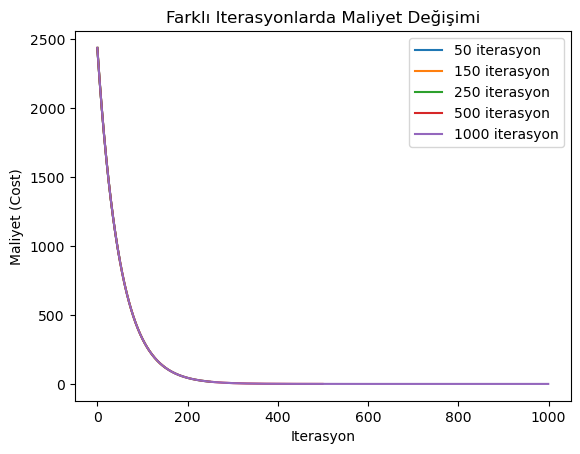

[(50, 910.7234126873375), (150, 122.01842671738329), (250, 16.347989138275185), (500, 0.10741418541058445), (1000, 4.6372043737376386e-06)]
1000
{50: {'J_history': array([2438.58237682, 2390.05458752, 2342.49250123, 2295.87690045,
       2250.18895014, 2205.41019003, 2161.52252725, 2118.50822895,
       2076.3499152 , 2035.03055189, 1994.5334439 , 1954.84222837,
       1915.94086802, 1877.81364475, 1840.44515322, 1803.82029467,
       1767.92427081, 1732.74257782, 1698.26100052, 1664.46560661,
       1631.34274104, 1598.87902049, 1567.06132798, 1535.87680756,
       1505.31285909, 1475.35713319, 1445.99752624, 1417.22217547,
       1389.01945418, 1361.37796704, 1334.28654549, 1307.73424324,
       1281.7103318 , 1256.2042962 , 1231.2058307 , 1206.70483467,
       1182.69140846, 1159.15584943, 1136.08864803, 1113.48048393,
       1091.3222223 , 1069.60491008, 1048.31977237, 1027.4582089 ,
       1007.01179054,  986.97225591,  967.33150802,  948.08161101,
        929.21478695,  910.72341

In [22]:
results = {}
alpha = 0.01
iteration_list = [50, 150, 250, 500, 1000]

plt.figure()
for num_iter in iteration_list:
    theta, J_history = gradientDescentMulti(X_train, y, theta_init.copy(), alpha, num_iter)
    results[num_iter] = {'J_history': J_history}
    plt.plot(np.arange(num_iter), J_history, label=f"{num_iter} iterasyon")

last_costs = [(num_iter, data['J_history'][-1]) for num_iter, data in results.items()]
best_iteration_count = min(last_costs, key=lambda t: t[1])[0]

plt.xlabel("Iterasyon")
plt.ylabel("Maliyet (Cost)")
plt.title("Farklı Iterasyonlarda Maliyet Değişimi")
plt.legend()
plt.show()

print(last_costs)
print(best_iteration_count)
print(results)


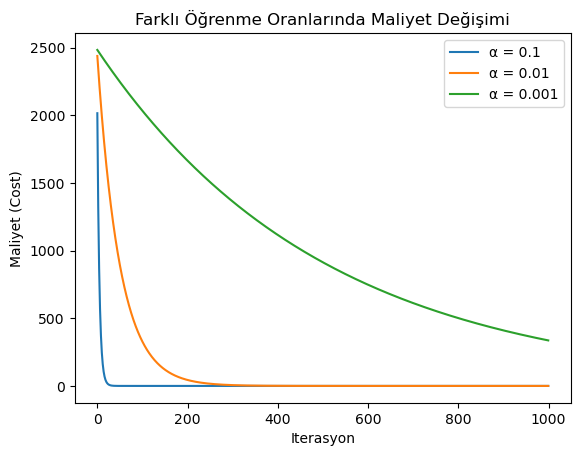

[(0.1, 1.6155871338926322e-27), (0.01, 4.6372043737376386e-06), (0.001, 336.3903228462891)]
0.1
{0.1: {'J_history': array([2.01535734e+03, 1.63243944e+03, 1.32227595e+03, 1.07104352e+03,
       8.67545250e+02, 7.02711652e+02, 5.69196438e+02, 4.61049115e+02,
       3.73449783e+02, 3.02494324e+02, 2.45020403e+02, 1.98466526e+02,
       1.60757886e+02, 1.30213888e+02, 1.05473249e+02, 8.54333318e+01,
       6.92009988e+01, 5.60528090e+01, 4.54027753e+01, 3.67762480e+01,
       2.97887609e+01, 2.41288963e+01, 1.95444060e+01, 1.58309689e+01,
       1.28230848e+01, 1.03866987e+01, 8.41322593e+00, 6.81471300e+00,
       5.51991753e+00, 4.47113320e+00, 3.62161789e+00, 2.93351049e+00,
       2.37614350e+00, 1.92467623e+00, 1.55898775e+00, 1.26278008e+00,
       1.02285186e+00, 8.28510008e-01, 6.71093107e-01, 5.43585417e-01,
       4.40304187e-01, 3.56646392e-01, 2.88883577e-01, 2.33995698e-01,
       1.89536515e-01, 1.53524577e-01, 1.24354908e-01, 1.00727475e-01,
       8.15892549e-02, 6.6087296

In [23]:
learning_rates = [0.1, 0.01, 0.001]
results = {}
plt.figure()
for alpha in learning_rates:
    theta, J_history = gradientDescentMulti(X_train, y, theta_init.copy(), alpha, best_iteration_count)
    results[alpha] = {'J_history': J_history} # şunu birde sadece J_history olarak dene :(
    plt.plot(np.arange(best_iteration_count), J_history, label=f"α = {alpha}")

last_costs = [(alpha, data['J_history'][-1]) for alpha, data in results.items()]
best_learning_rates = min(last_costs, key=lambda t: t[1])[0]

plt.xlabel("Iterasyon")
plt.ylabel("Maliyet (Cost)")
plt.title("Farklı Öğrenme Oranlarında Maliyet Değişimi")
plt.legend()
plt.show()

print(last_costs)
print(best_learning_rates)
print(results)

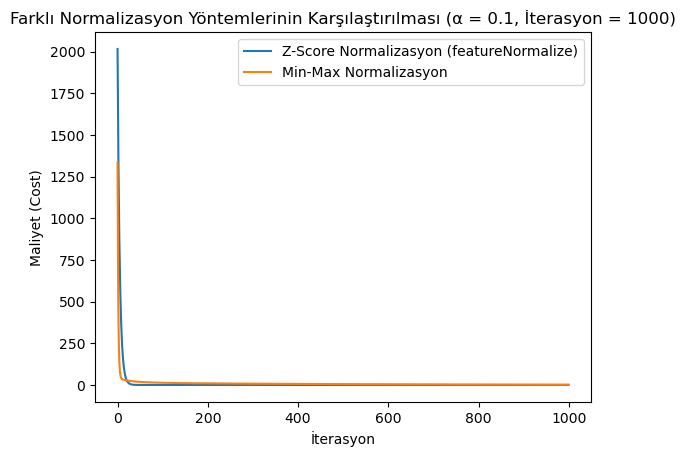

In [24]:

# 1. Z-Score Normalizasyon
X_norm_zscore, _, _ = featureNormalize(X)
X_train_zscore = np.hstack((np.ones((X_norm_zscore.shape[0], 1)), X_norm_zscore))
_, J_history_zscore = gradientDescentMulti(X_train_zscore, y, theta_init.copy(), best_learning_rates, best_iteration_count)

# 2. Min-Max Normalizasyon
X_norm_minmax = normalize_minmax(X)
X_train_minmax = np.hstack((np.ones((X_norm_minmax.shape[0], 1)), X_norm_minmax))
_, J_history_minmax = gradientDescentMulti(X_train_minmax, y, theta_init.copy(), best_learning_rates, best_iteration_count)


# --- Sonuçların Grafik Olarak Sunulması ---
plt.figure()
plt.plot( J_history_zscore, label="Z-Score Normalizasyon (featureNormalize)")
plt.plot( J_history_minmax, label="Min-Max Normalizasyon")

plt.title(f"Farklı Normalizasyon Yöntemlerinin Karşılaştırılması (α = {best_learning_rates}, İterasyon = {best_iteration_count})")
plt.xlabel("İterasyon")
plt.ylabel("Maliyet (Cost)")
plt.legend()
plt.show()